In [2]:
import os, sys, glob
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

plt.style.use('science')

sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")

from Lib_GeneralFunctions import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *
from Lib_SigmoidProcessing import *
from Lib_SpectrogramPlot import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_MatlabReader import *
from GeneratePaperFigs import LabelizeAxisList


import pandas as pd

In [3]:
def FormatLineLabels(Axis, LabelList, **kwargs):
    Lines = Axis.get_lines()
    legend2 = Axis.legend(Lines, LabelList , **kwargs)
    Axis.add_artist(legend2)

In [29]:
from palettable.cartocolors.qualitative import Safe_8_r as ElColor
cmap = ElColor.mpl_colors

from palettable.scientific.sequential import Nuuk_20 as ElColor
cmapCont = ElColor.mpl_colormap

In [30]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [31]:
FolderPath = '/home/nico/Documents/Documents/SharedWolfel/PaperData/ReceiverData/20220325/'
Filename = 'Receivers_TEAR46_Kos_T0_P3_025x025_A12phi65_Delta1.001_4s_4630_d25.025.pickle'
ListReceivers = LoadPickleFile(FolderPath, Filename)

ListReceivers

[SingleTimeProfile([0, 25.025]),
 SingleTimeProfile([2000, 25.025]),
 SingleTimeProfile([4000, 25.025]),
 SingleTimeProfile([6000, 25.025]),
 SingleTimeProfile([8000, 25.025]),
 SingleTimeProfile([0, 25]),
 SingleTimeProfile([2000, 25]),
 SingleTimeProfile([4000, 25]),
 SingleTimeProfile([6000, 25]),
 SingleTimeProfile([8000, 25]),
 SingleTimeProfile([0, 50]),
 SingleTimeProfile([2000, 50]),
 SingleTimeProfile([4000, 50]),
 SingleTimeProfile([6000, 50]),
 SingleTimeProfile([8000, 50]),
 SingleTimeProfile([0, 100]),
 SingleTimeProfile([2000, 100]),
 SingleTimeProfile([4000, 100]),
 SingleTimeProfile([6000, 100]),
 SingleTimeProfile([8000, 100]),
 SingleTimeProfile([0, 200]),
 SingleTimeProfile([2000, 200]),
 SingleTimeProfile([4000, 200]),
 SingleTimeProfile([6000, 200]),
 SingleTimeProfile([8000, 200]),
 SingleTimeProfile([0, 300]),
 SingleTimeProfile([2000, 300]),
 SingleTimeProfile([4000, 300]),
 SingleTimeProfile([6000, 300]),
 SingleTimeProfile([8000, 300]),
 SingleTimeProfile([0, 

In [39]:
def Format_ProfilePlot(Label, ax, ListReceivers, StationIDX, scaling, nstat):
    axT = ax.twinx()
    axT.set_ylim(ax.get_ylim())

    axT.set_ylabel(Label)

    ax.set_yticks([ListReceivers[StationIDX+5*j].Coord[1]/scaling for j in range(1,nstat)])
    ax.set_yticklabels([ListReceivers[StationIDX+5*j].Coord[1] for j in range(1,nstat)])
    ax.set_ylabel("$y$ [m]")
    ax.set_xlabel("time [s]")

def Format_PlotMagnitudeSpectra(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim([0.00001,0.1])
    ax.set_ylabel("Amplitude spectrum")
    ax.set_xlabel("Frequency [Hz]")
    
    
def AddStyleLegend(Axes):                        
    LinesContDisc = []
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                         linewidth = 1, label ="SEM2DPACK" ))
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                         linewidth = 1, label ="se2dr" ))
    
    legendContDisc = Axes.legend(LinesContDisc, ["SEM2DPACK","se2dr"],loc=6)
    Axes.add_artist(legendContDisc)

def GetLineReceiver2Legend(ax,ListReceivers,StationIDX,TextColor):
    RecLoc = ListReceivers[StationIDX].Coord
    LabelText = "Receiver at ({} m, {} m)".format(RecLoc[0],RecLoc[1])
    legendContDisc = ax.legend(ax.get_lines(), [LabelText],loc=4)
    plt.setp(legendContDisc.get_texts(), color=TextColor)
    ax.add_artist(legendContDisc)
    
def CustomTickX(ax,Label,Loc):
    dic = { Loc : Label}
    ticks = ax.get_xticks()
    
    ticks=np.append(ticks,Loc)

    xtl=ticks.tolist()
    xtl[-1]=Label
    ax.set_xticks(ticks)
    ax.set_xticklabels(xtl)

In [40]:
Cs=3464
Cs=2309
G=10

f_se2dr = 3*Cs/(30*25)
f_sem2dpack = 6*Cs/(G*100)
print(f_se2dr,f_sem2dpack)

9.236 13.854


[0, 25]
[0, 500]
[2000, 25]
[2000, 500]
[4000, 25]
[4000, 500]


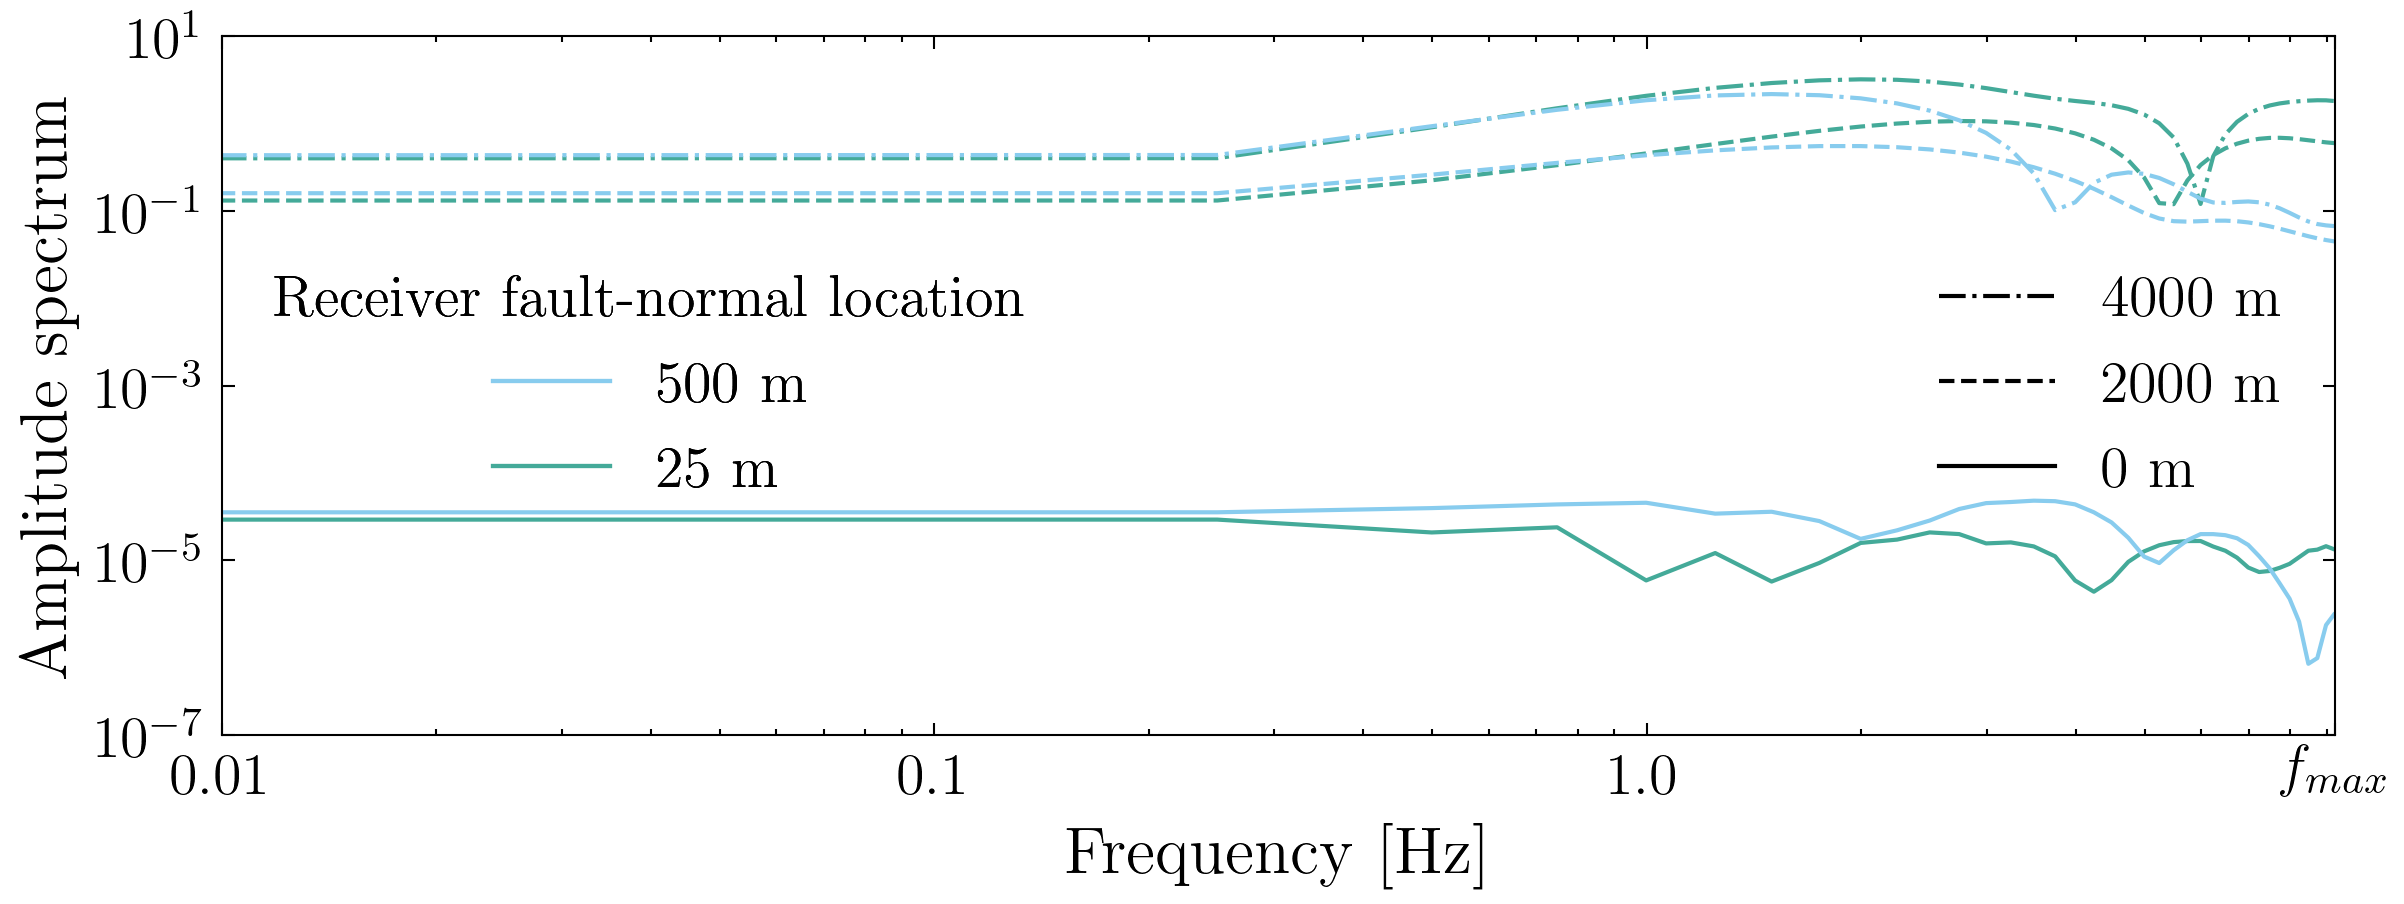

In [52]:
fig = plt.figure(figsize = (8,3),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


ls=["-","--","-."]
for idx in range(3):
    for j in [1,7]: # Y location index
        Xloc = idx# X location index
        Yloc = j*5
        StationIDX = Xloc + Yloc

        i = StationIDX 
        Ycoord = ListReceivers[i].Coord[1]
        Xcoord = ListReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
        AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


        print(ListReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        ax.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j],ls=ls[idx])

LinesContDisc = []
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-.",
                     linewidth = 1, label ="4000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                     linewidth = 1, label ="2000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                     linewidth = 1, label ="0 m" ))

legendContDisc = ax.legend(LinesContDisc, ["4000 m","2000 m","0 m"],loc=7)
ax.add_artist(legendContDisc)


Lines2 = []
Lines2.append(mlines.Line2D([], [], color = cmap[7], ls = "-",
                     linewidth = 1, label ="500 m" ))
Lines2.append(mlines.Line2D([], [], color = cmap[1], ls = "-",
                     linewidth = 1, label ="25 m" ))

Lines2Legend = ax.legend(Lines2, ["500 m","25 m"],loc=6, title="Receiver fault-normal location")
ax.add_artist(Lines2Legend)

Format_PlotMagnitudeSpectra(ax)
ax.set_ylim([0.0000001,10])

#ax.set_title("Kostrov, fault-normal acceleration spectra")
CustomTickX(ax,"$f_{max}$", f_se2dr)
ax.set_xlim([1e-2,f_se2dr])


OutFile = "/home/nico/Documents/Documents/SharedWolfel/Works/se2dr_Paper/Illustrations/FinalFigures/F{}.pdf"
fig.savefig(OutFile.format("Sa"))

[0, 25.025]
[0, 25]
[2000, 25]
[2000, 50]
[4000, 50]
[4000, 100]


Text(0.5, 1.0, 'Kostrov, fault-normal velocity spectra')

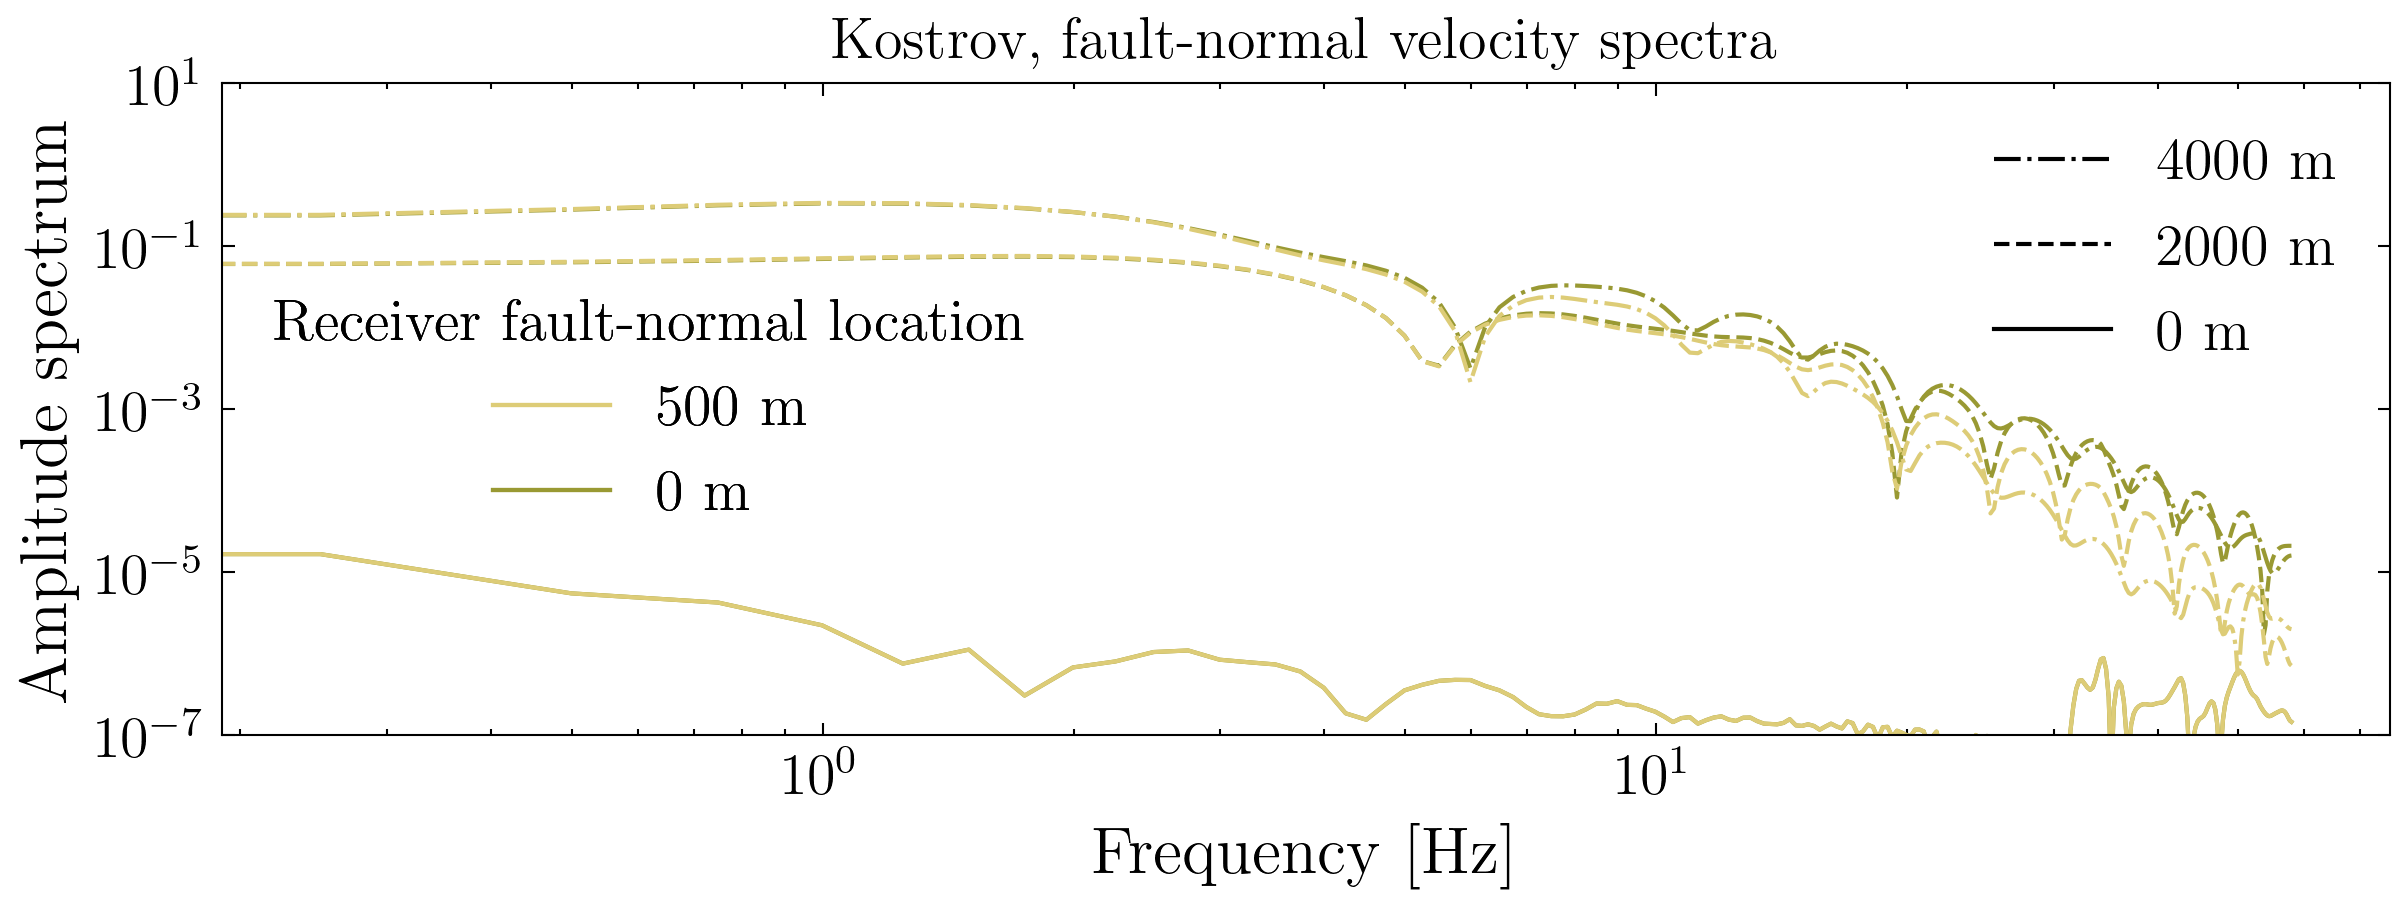

In [49]:
fig = plt.figure(figsize = (8,3),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


ls=["-","--","-."]
for idx in range(3):
    for j in [0,5]: # Y location index
        Xloc = idx*6 # X location index
        Yloc = j
        StationIDX = Xloc + Yloc

        i = StationIDX 
        Ycoord = ListReceivers[i].Coord[1]
        Xcoord = ListReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)


        print(ListReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        ax.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j],ls=ls[idx])

LinesContDisc = []
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-.",
                     linewidth = 1, label ="4000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                     linewidth = 1, label ="2000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                     linewidth = 1, label ="0 m" ))

legendContDisc = ax.legend(LinesContDisc, ["4000 m","2000 m","0 m"],loc=1)
ax.add_artist(legendContDisc)


Lines2 = []
Lines2.append(mlines.Line2D([], [], color = cmap[5], ls = "-",
                     linewidth = 1, label ="500 m" ))
Lines2.append(mlines.Line2D([], [], color = cmap[0], ls = "-",
                     linewidth = 1, label ="0 m" ))

Lines2Legend = ax.legend(Lines2, ["500 m","0 m"],loc=6, title="Receiver fault-normal location")
ax.add_artist(Lines2Legend)

Format_PlotMagnitudeSpectra(ax)
ax.set_ylim([0.0000001,10])
ax.set_title("Kostrov, fault-normal velocity spectra")

In [ ]:
fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


ls=["-","--","-."]
for idx in range(3):
    for j in [0,5]: # Y location index
        Xloc = idx*6 # X location index
        Yloc = j
        StationIDX = Xloc + Yloc

        i = StationIDX 
        Ycoord = ListReceivers[i].Coord[1]
        Xcoord = ListReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].DispY)


        print(ListReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        ax.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j],ls=ls[idx])

LinesContDisc = []
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-.",
                     linewidth = 1, label ="4000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                     linewidth = 1, label ="2000 m" ))
LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                     linewidth = 1, label ="0 m" ))

legendContDisc = ax.legend(LinesContDisc, ["4000 m","2000 m","0 m"],loc=1)
ax.add_artist(legendContDisc)


Lines2 = []
Lines2.append(mlines.Line2D([], [], color = cmap[5], ls = "-",
                     linewidth = 1, label ="500 m" ))
Lines2.append(mlines.Line2D([], [], color = cmap[0], ls = "-",
                     linewidth = 1, label ="0 m" ))

Lines2Legend = ax.legend(Lines2, ["500 m","0 m"],loc=6, title="Receiver fault-normal location")
ax.add_artist(Lines2Legend)

Format_PlotMagnitudeSpectra(ax)
ax.set_ylim([0.0000001,1])

ax.set_title("Kostrov, fault-normal displacement spectra")



In [37]:
locs

NameError: name 'locs' is not defined